In [27]:
#!pip install seaborn 
#!pip install matplotlib 

import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 6]

In [28]:
# Obtenemos lod datos del archivo de ventas de bibicletas
df = pd.read_csv('compradores_clean.csv')
df.head()

,uid,id,phone,email,first_name,last_name,gender,birthday,location,hometown,relationship_status,date,quantity,price,brand,category,type,detail
0,100034704393808,AG2004022,XXXXXXX7647,NaN,Andres,Cuasquen,male,NaN,Tulcan,Tulcan,Single,2021-06-01,2,259.0,Elite,Accesorios,Ciclosimuladores,CICLOSIMULADOR NOVO FORCE
1,100010415584337,AG2004006,XXXXXXX2501,NaN,Nelson,Nazamuez,male,NaN,Tulcan,Tulcan,NaN,2021-06-01,1,265.0,Eagle,Bicicletas,Paseo,Eagle City Bike Aro 700 Cuadro Aluminio
2,100001924592151,AG2004001,XXXXXXX8732,NaN,Jhon,Caino,male,NaN,Tulcan,Tulcan,NaN,2021-06-01,2,16.0,Shimano,Accesorios,Discos,Disco SHIMANO TX SM-RT10
3,100010415584337,AG2004024,XXXXXXX2501,NaN,Nelson,Nazamuez,male,NaN,Tulcan,Tulcan,NaN,2021-06-01,2,75.0,Lazer,Casco,Sport,CASCO JACKAL /MIPS
4,100000396260059,AG2004015,XXXXXXX4510,NaN,Cristofer,Rodriguez Portilla,male,06/10/1986,Tulcan,Tulcan,Married,2021-06-01,1,475.0,Giant,Bicicletas,Montanera,Talon 4 Aro 29 Aluminio


In [29]:
# df.drop(['uid', 'id','phone','email','first_name','last_name','birthday','date','location','hometown','quantity','price','detail'], axis=1, inplace=True)
df = df[['uid','gender','type']]

In [30]:
df.head()

,uid,gender,type
0,100034704393808,male,Ciclosimuladores
1,100010415584337,male,Paseo
2,100001924592151,male,Discos
3,100010415584337,male,Sport
4,100000396260059,male,Montanera


In [31]:
# Obtenemos la matriz intercambiando booleanos en lugar de strings
df1 = pd.DataFrame()
for col in df:
    if is_string_dtype(df[col]): # si es que la columna es de strings
        aux=pd.get_dummies(data=df[col])
        for acol in aux:
            df1[acol] = aux[acol]
    else:
        df1[col] = df[col]
df1.describe(include='all')

,uid,female,male,Ciclosimuladores,Discos,Gafas,Grips,Montanera,Montanera,Monturas,Paseo,Ruta,Sport,TT/TRI/TRACK,Timones,Zapatillas
count,2.220000e+03,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000
mean,9.798448e+13,0.413964,0.533333,0.087838,0.132432,0.042793,0.050000,0.166216,0.030180,0.064414,0.076577,0.106757,0.083784,0.032432,0.081081,0.045495
std,1.409700e+13,0.492653,0.499000,0.283123,0.339037,0.202435,0.217994,0.372358,0.171121,0.245545,0.265978,0.308873,0.277126,0.177186,0.273021,0.208435
min,5.252530e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000030e+14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000071e+14,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000157e+14,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000400e+14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df1.head()

,uid,female,male,Ciclosimuladores,Discos,Gafas,Grips,Montanera,Montanera,Monturas,Paseo,Ruta,Sport,TT/TRI/TRACK,Timones,Zapatillas
0,100034704393808,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,100010415584337,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,100001924592151,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,100010415584337,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,100000396260059,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [33]:
df1.dtypes

uid                 int64
female              uint8
male                uint8
Ciclosimuladores    uint8
Discos              uint8
Gafas               uint8
Grips               uint8
Montanera           uint8
Montanera           uint8
Monturas            uint8
Paseo               uint8
Ruta                uint8
Sport               uint8
TT/TRI/TRACK        uint8
Timones             uint8
Zapatillas          uint8
dtype: object

In [34]:
from mlxtend.frequent_patterns import apriori, association_rules

In [35]:
#df.drop(['uid', 'id','phone','email','first_name','last_name','birthday','date','price','detail'], axis=1, inplace=True)
df1.drop(['uid'] , axis=1, inplace=True)
frq_items = apriori(df1, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

   antecedents  consequents  antecedent support  consequent support   support  \
7       (Ruta)       (male)            0.106757            0.533333  0.064865   
5  (Montanera)       (male)            0.166216            0.533333  0.097748   
2     (Discos)       (male)            0.132432            0.533333  0.071622   
1     (Discos)     (female)            0.132432            0.413964  0.058108   
4       (male)  (Montanera)            0.533333            0.166216  0.097748   

   confidence      lift  leverage  conviction  
7    0.607595  1.139241  0.007928    1.189247  
5    0.588076  1.102642  0.009099    1.132895  
2    0.540816  1.014031  0.000991    1.016296  
1    0.438776  1.059936  0.003286    1.044210  
4    0.183277  1.102642  0.009099    1.020889  


In [36]:
print(rules.head(10))

   antecedents  consequents  antecedent support  consequent support   support  \
7       (Ruta)       (male)            0.106757            0.533333  0.064865   
5  (Montanera)       (male)            0.166216            0.533333  0.097748   
2     (Discos)       (male)            0.132432            0.533333  0.071622   
1     (Discos)     (female)            0.132432            0.413964  0.058108   
4       (male)  (Montanera)            0.533333            0.166216  0.097748   
0     (female)     (Discos)            0.413964            0.132432  0.058108   
3       (male)     (Discos)            0.533333            0.132432  0.071622   
6       (male)       (Ruta)            0.533333            0.106757  0.064865   

   confidence      lift  leverage  conviction  
7    0.607595  1.139241  0.007928    1.189247  
5    0.588076  1.102642  0.009099    1.132895  
2    0.540816  1.014031  0.000991    1.016296  
1    0.438776  1.059936  0.003286    1.044210  
4    0.183277  1.102642  0.009

In [37]:
rules.to_csv('rulesTulcan.csv',index=False)

In [38]:
# pause

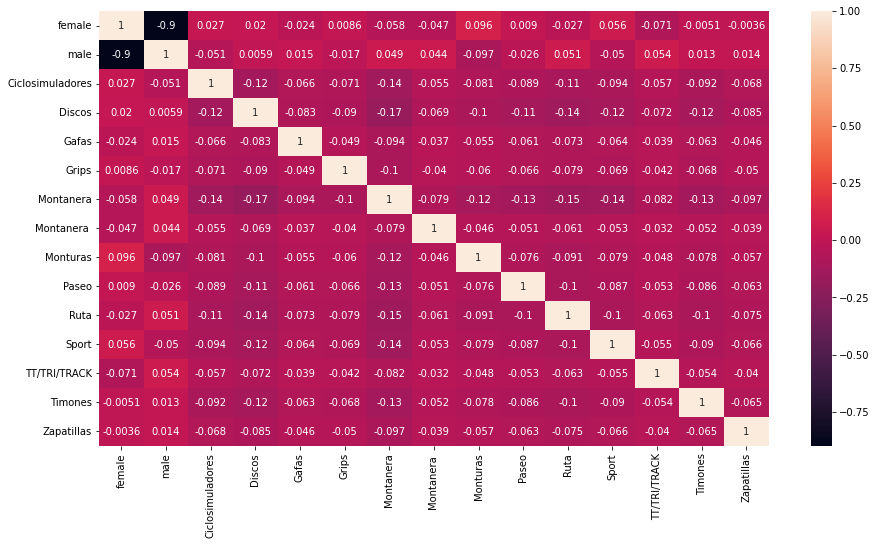

In [39]:
# Create correlation matrix 
corr = df1.corr()
plt.figure(figsize=(15,8))
sn.heatmap(corr, annot=True)
plt.savefig('corr_matrix.png')
plt.show()
